https://www.semanticscholar.org/reader/e81657338e48b233c8c6019832e6670fa552adb4

https://archive.ics.uci.edu/dataset/372/htru2

In [19]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import Rotator
from sklearn.manifold import MDS, TSNE, Isomap, LocallyLinearEmbedding

In [2]:
htru2 = fetch_ucirepo(id=372)

In [3]:
X = htru2.data.features
y = htru2.data.targets

In [4]:
len(X), len(y)

(17898, 17898)

In [5]:
print(htru2.metadata)
print(htru2.variables)

{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [6]:
hianyzo_ertekek = X.isnull().sum()
hianyzo_ertekek

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
dtype: int64

In [7]:
X.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [8]:
feature_cimkek = list(X.columns)
print(feature_cimkek)

['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis']


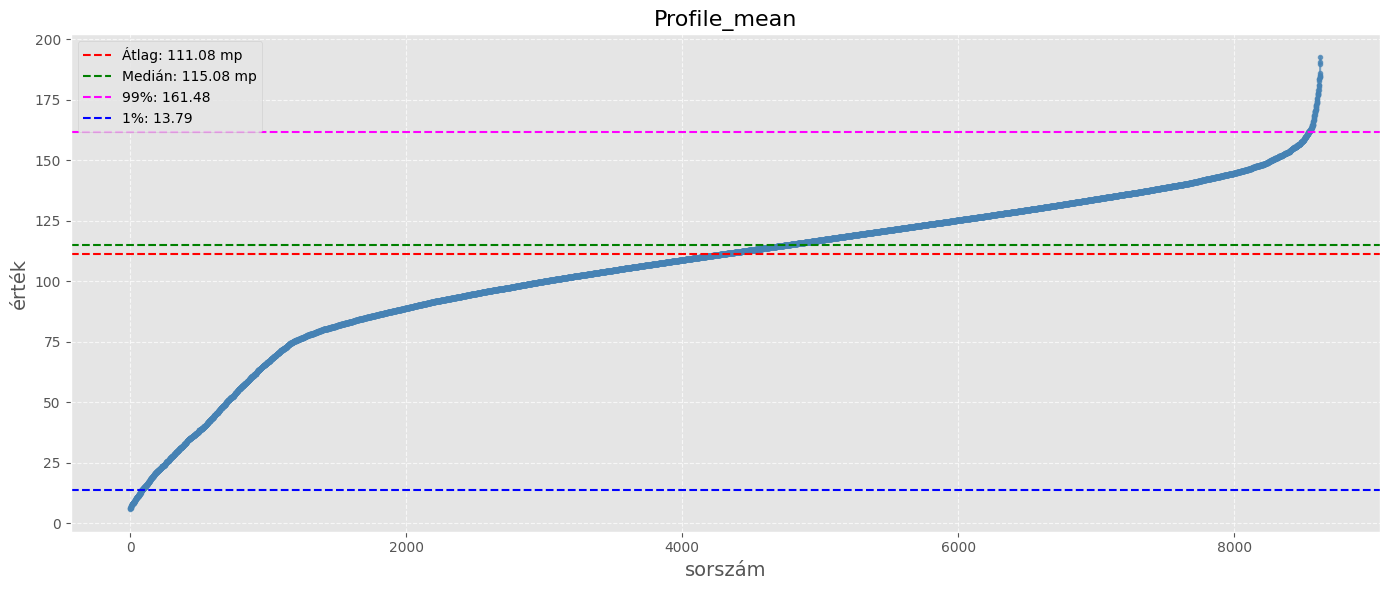

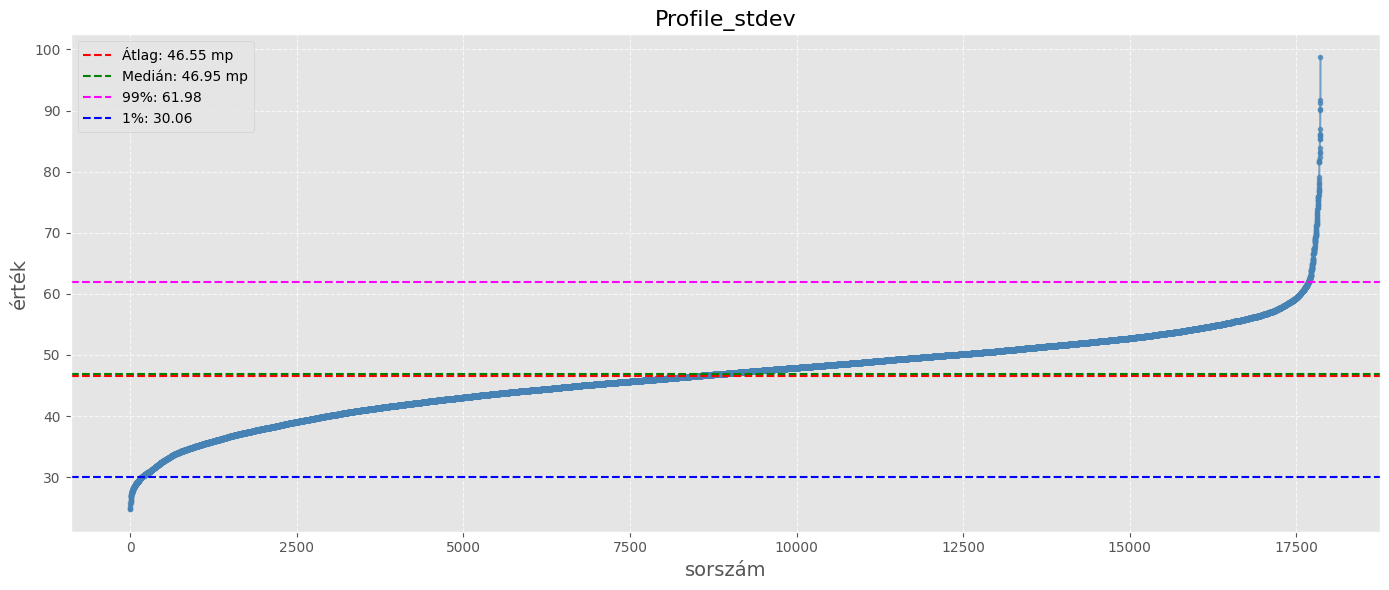

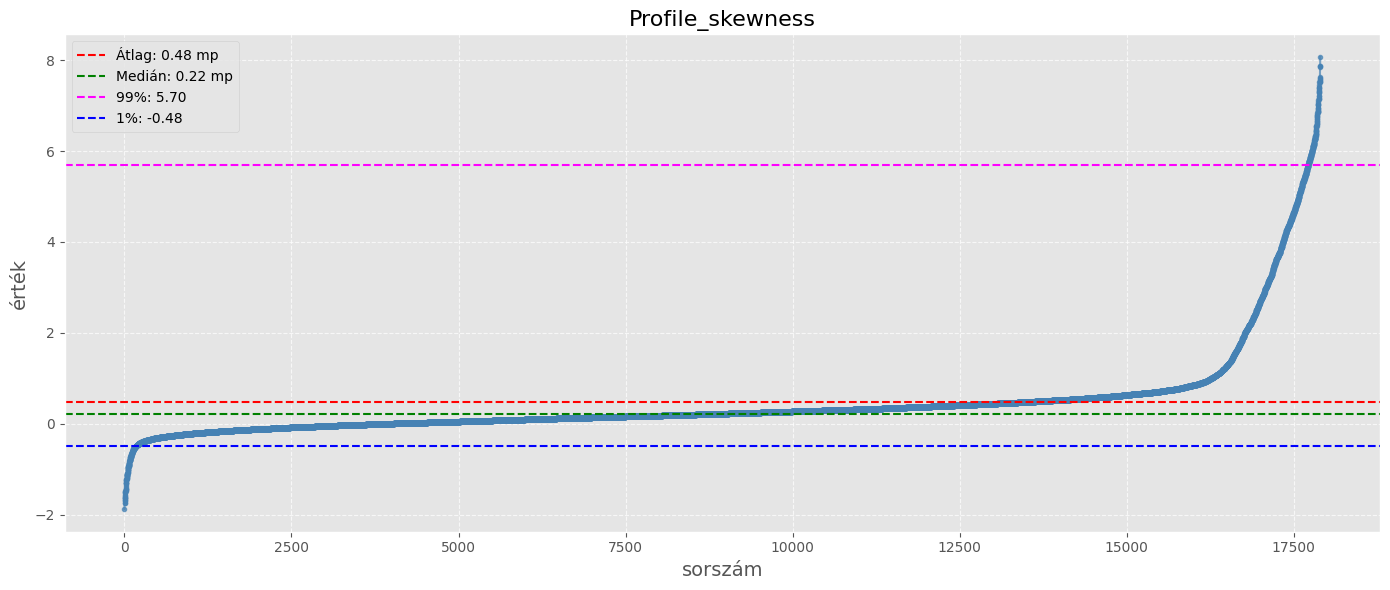

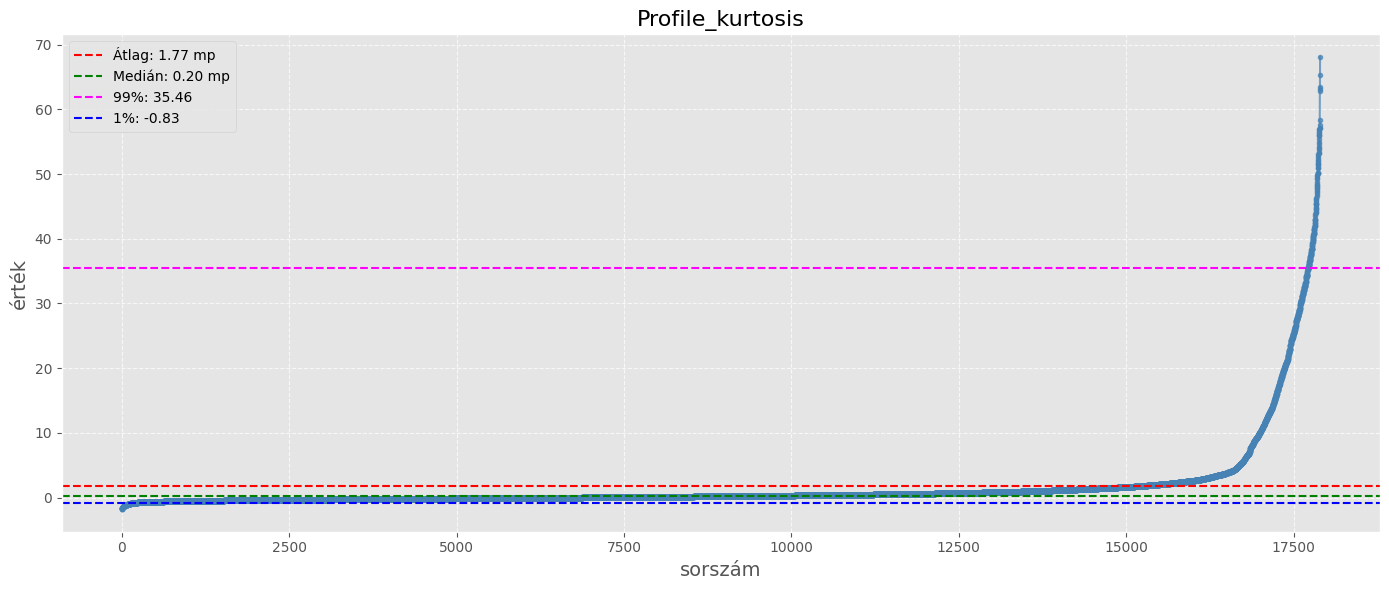

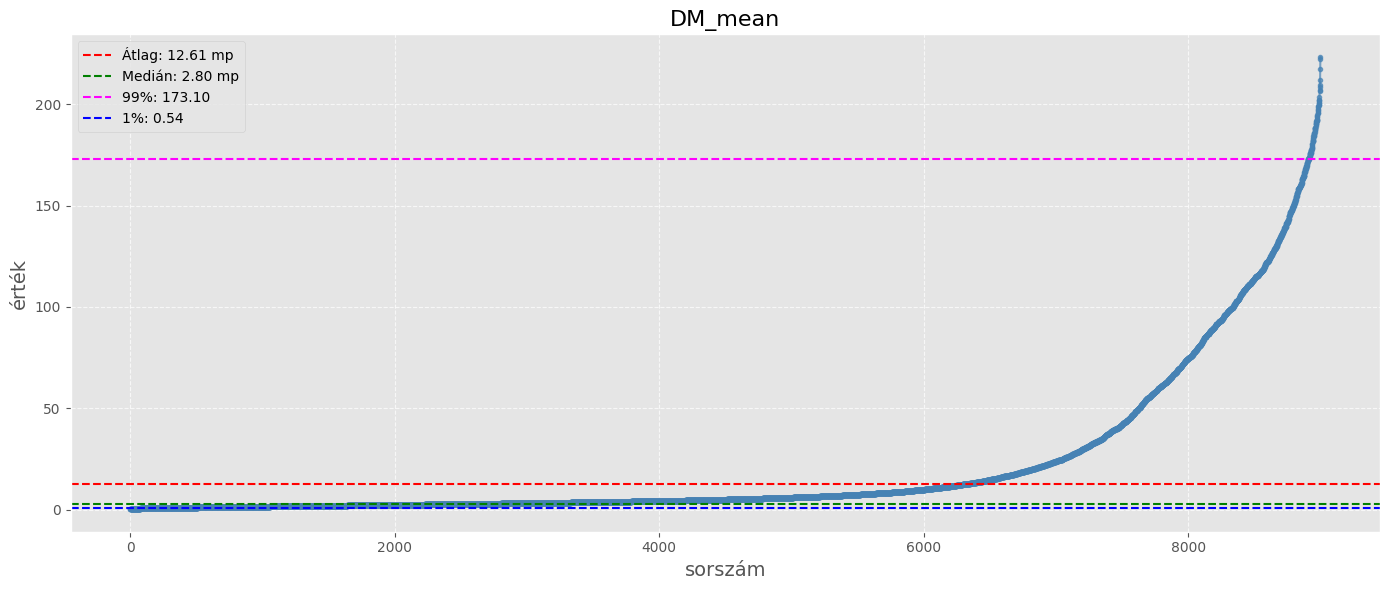

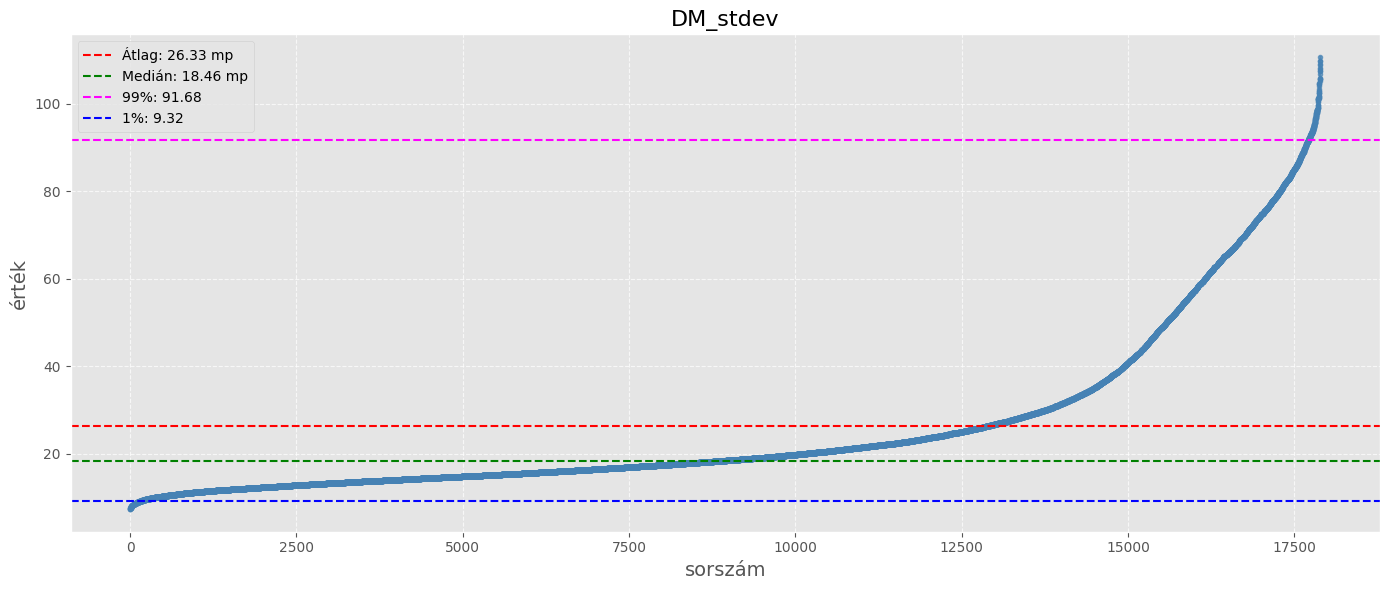

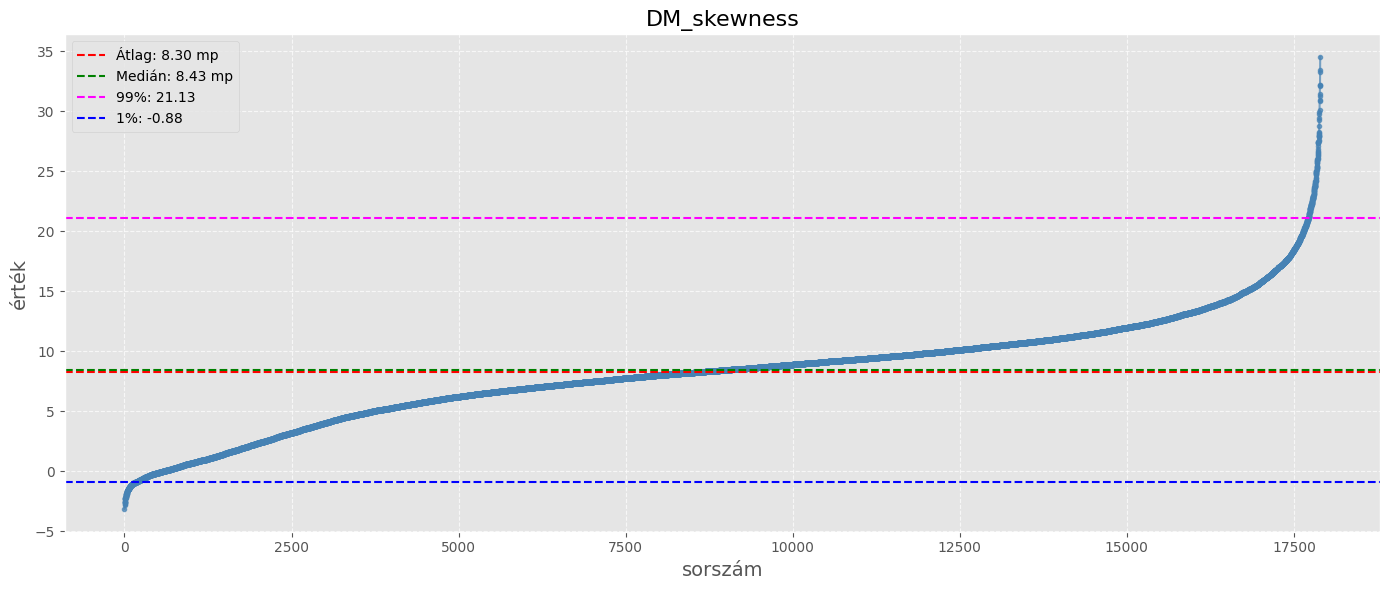

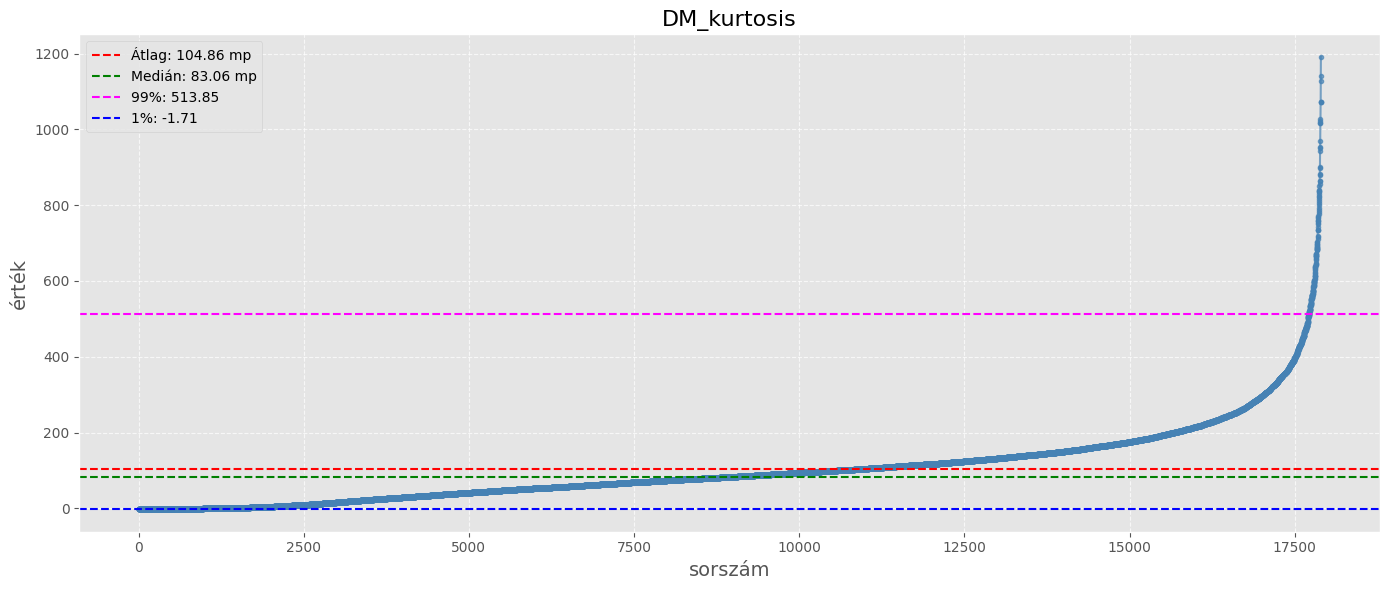

In [9]:
for adat in feature_cimkek:
    sorted_data = np.sort(X[adat].unique())
    sorted_data_99 = np.percentile(sorted_data, 99)
    sorted_data_1 = np.percentile(sorted_data, 1)
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 6))
    plt.plot(range(len(sorted_data)), sorted_data, marker='o', linestyle='-', color='steelblue', alpha=0.7, markersize=3)
    plt.title(adat, fontsize=16)
    plt.xlabel('sorszám', fontsize=14)
    plt.ylabel('érték', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=X[adat].mean(), color='red', linestyle='--', label=f'Átlag: {X[adat].mean():.2f} mp')
    plt.axhline(y=X[adat].median(), color='green', linestyle='--', label=f'Medián: {X[adat].median():.2f} mp')
    plt.axhline(y=sorted_data_99, color='magenta', linestyle='--', label=f'99%: {sorted_data_99:.2f}')
    plt.axhline(y=sorted_data_1, color='blue', linestyle='--', label=f'1%: {sorted_data_1:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=feature_cimkek)

In [11]:
X_rbst = pd.DataFrame(RobustScaler().fit_transform(X), columns=feature_cimkek)

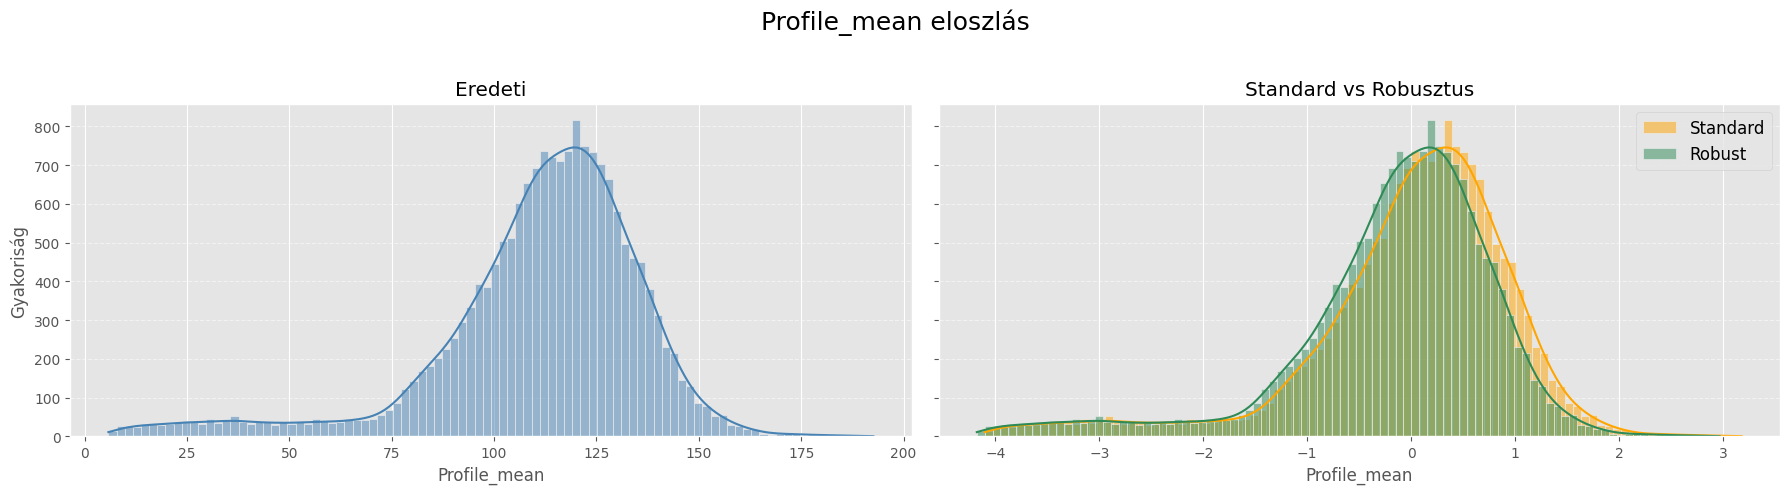

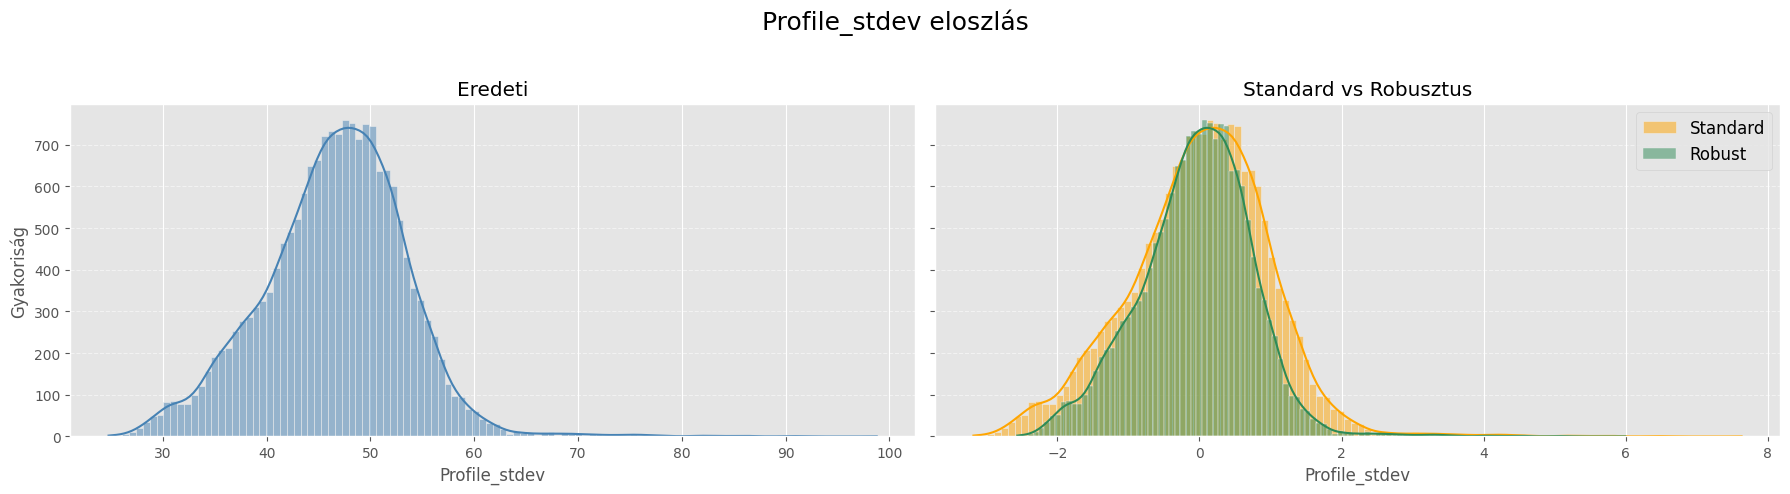

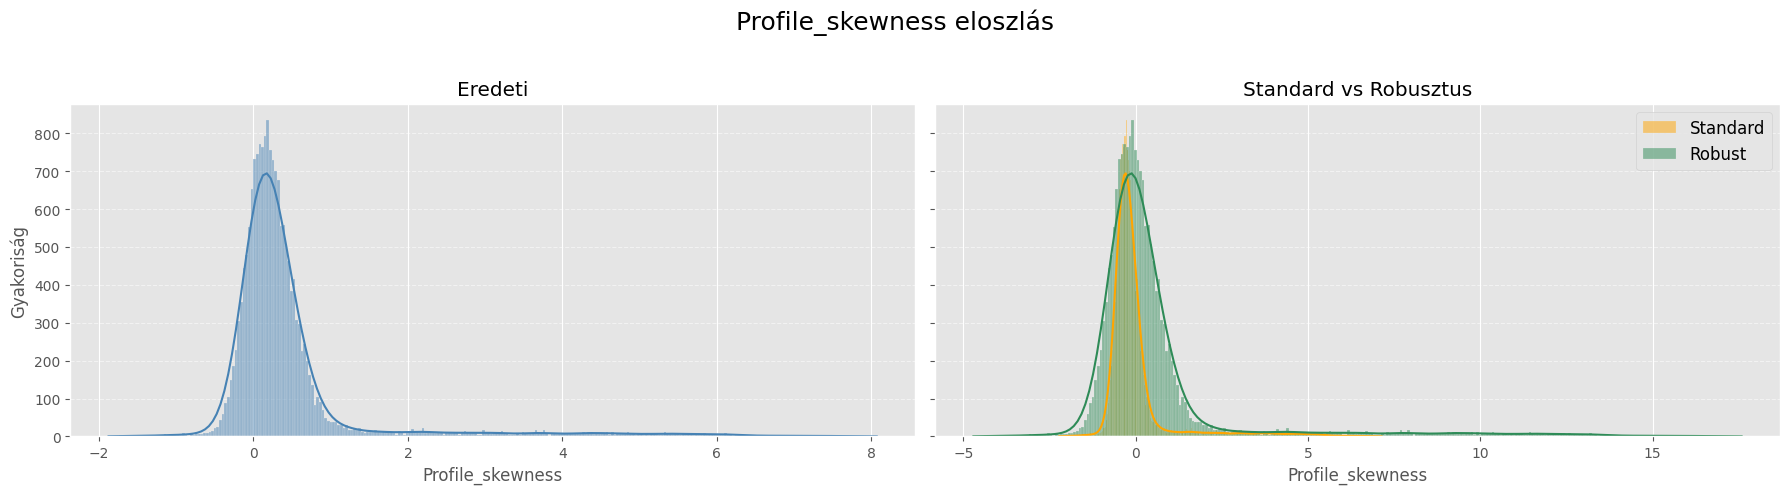

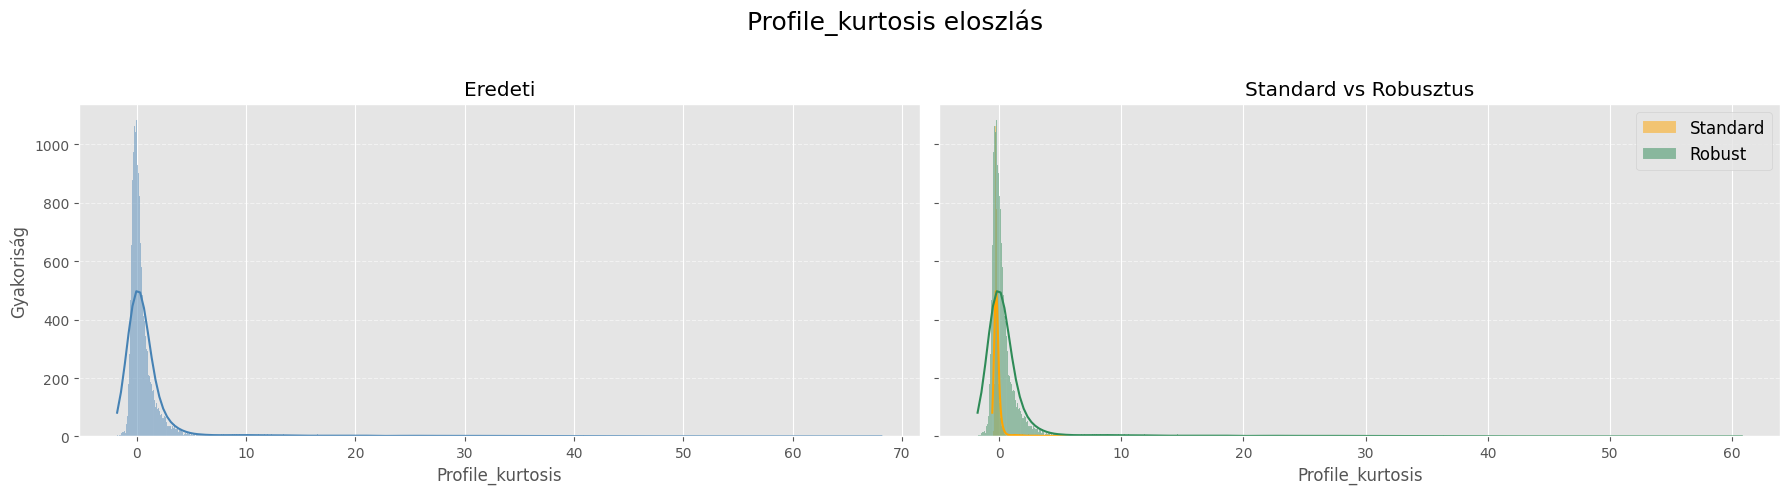

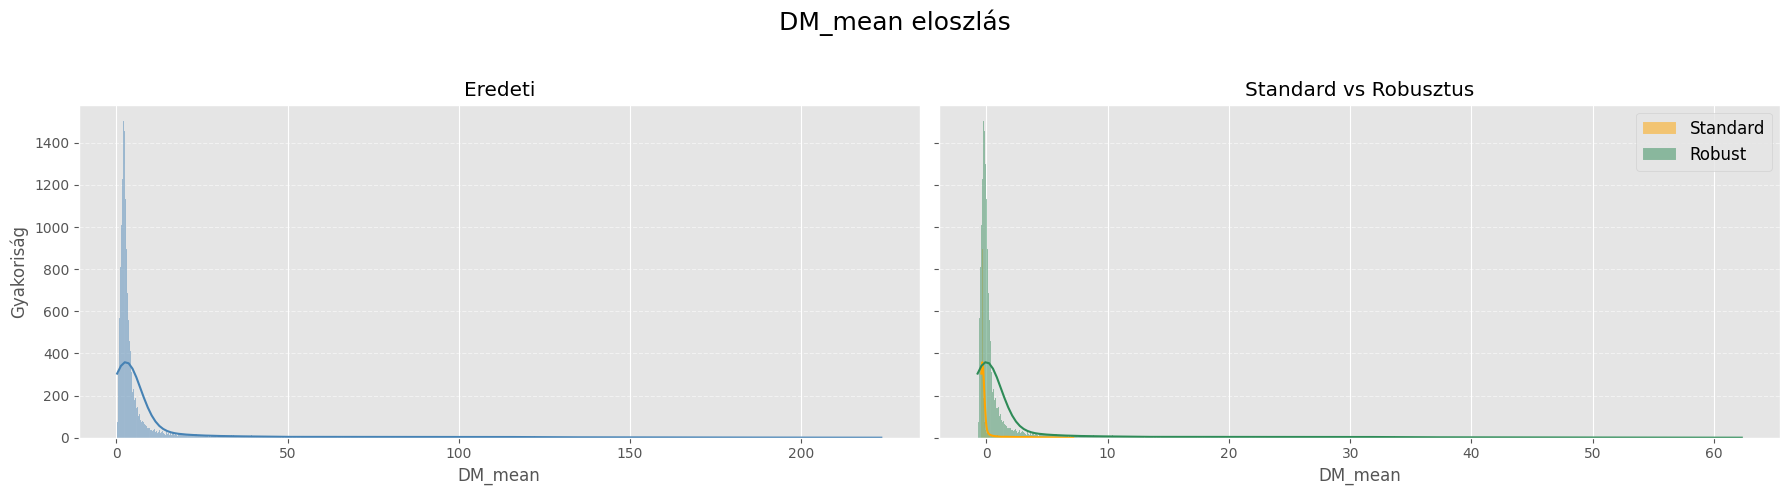

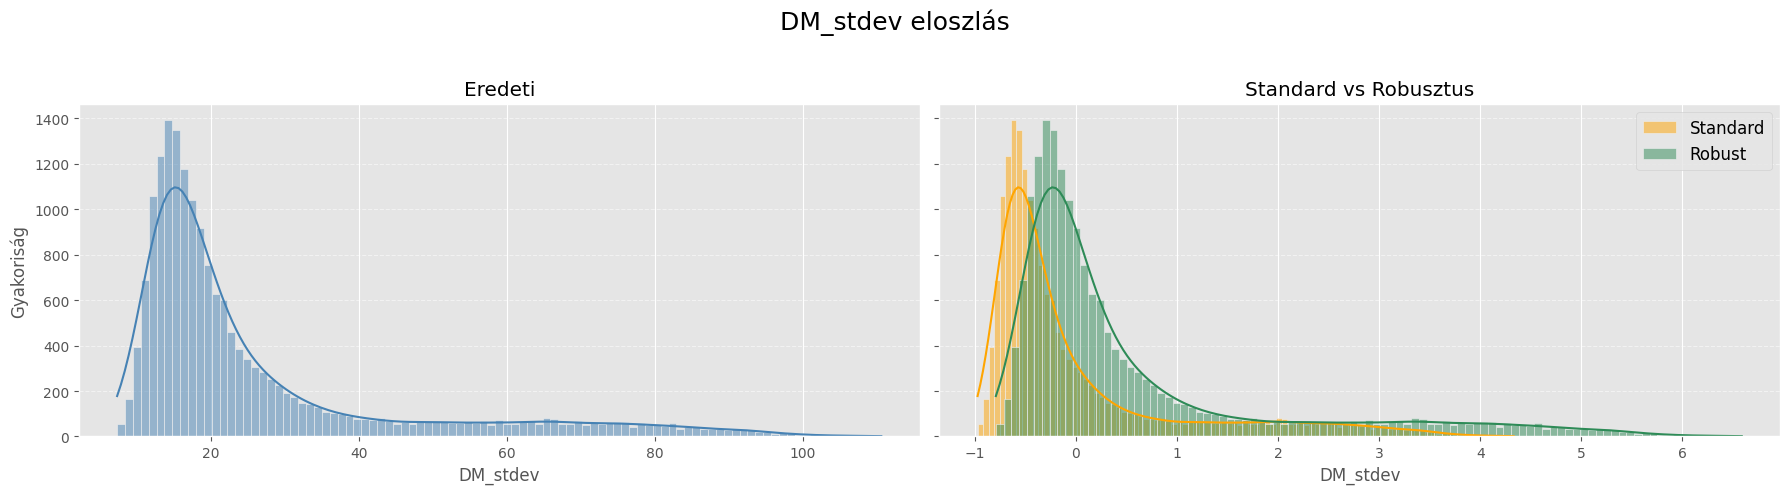

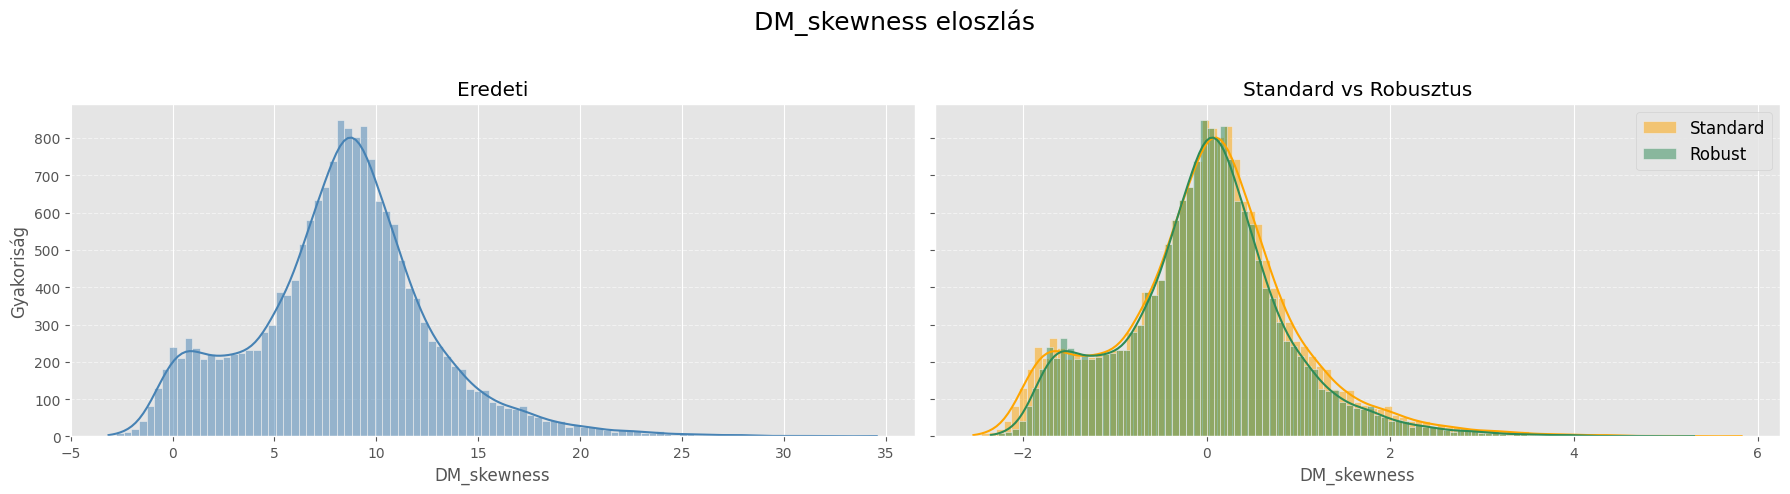

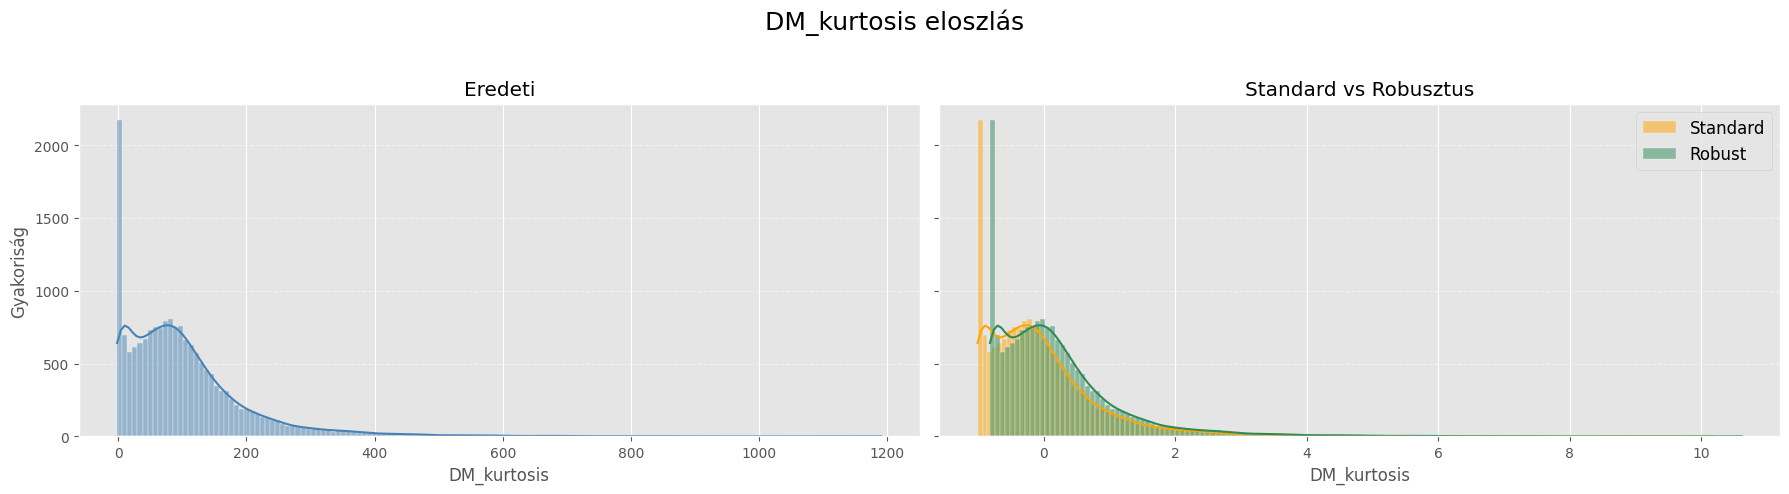

In [12]:
for adat in feature_cimkek:
    fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
    plt.suptitle(f'{adat} eloszlás', fontsize=18)
    sns.set_palette("muted")

    sns.histplot(data=X, x=adat, kde=True, color='steelblue', ax=axes[0])
    axes[0].set_title('Eredeti')
    axes[0].set_xlabel(adat)
    axes[0].set_ylabel('Gyakoriság')
    axes[0].grid(axis='y', linestyle='--', alpha=0.5)

    sns.histplot(data=X_std, x=adat, kde=True, color='orange', ax=axes[1], label='Standard')
    sns.histplot(data=X_rbst, x=adat, kde=True, color='seagreen', ax=axes[1], label='Robust', alpha=0.5)
    axes[1].set_title('Standard vs Robusztus')
    axes[1].set_xlabel(adat)
    axes[1].grid(axis='y', linestyle='--', alpha=0.5)

    plt.legend(fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

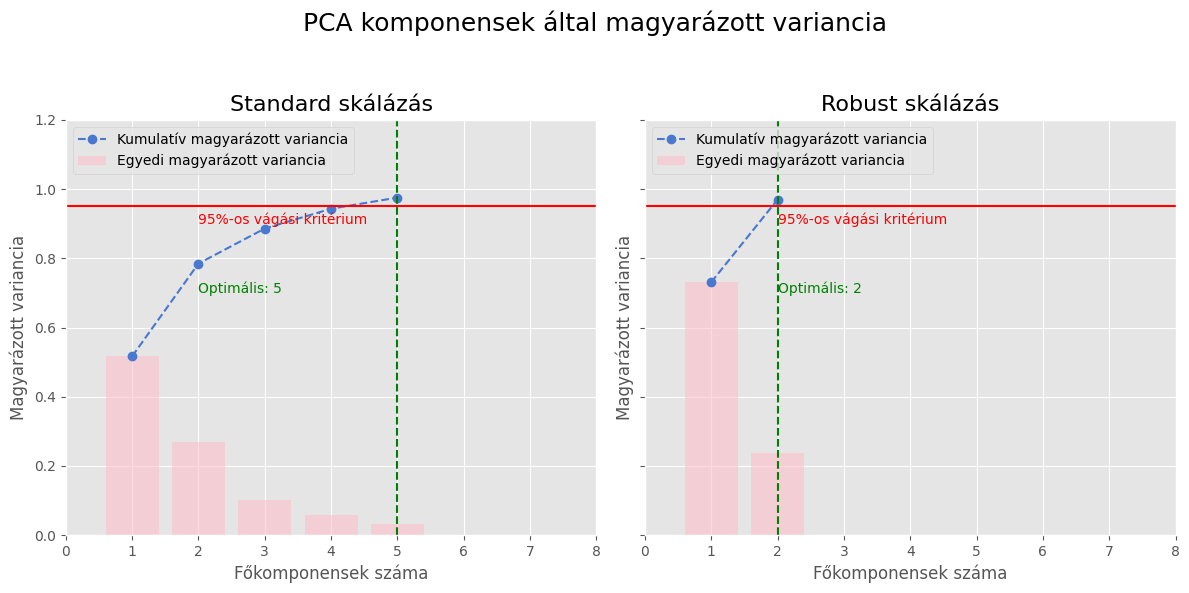

In [13]:
pca_results = {}

for tipus, adat in {"standard": X_std, "robust": X_rbst}.items():
    pca = PCA(n_components = 0.95, svd_solver = 'full')
    pca.fit(adat)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()
    optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance < 0.95]) + 1

    pca_results[tipus] = {
        "explained": explained_variance_ratio,
        "cumulative": cumulative_explained_variance,
        "optimal": optimal_num_components
    }

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("PCA komponensek által magyarázott variancia", fontsize=18)

for ax, (tipus, results) in zip(axes, pca_results.items()):
    ax.bar(range(1, len(results["explained"]) + 1), results["explained"], alpha=0.6, color='pink', label='Egyedi magyarázott variancia')
    ax.plot(range(1, len(results["cumulative"]) + 1), results["cumulative"], marker='o', linestyle='--', label='Kumulatív magyarázott variancia')
    ax.set_title(f'{tipus.capitalize()} skálázás', fontsize=16)
    ax.set_xlabel('Főkomponensek száma')
    ax.set_ylabel('Magyarázott variancia')
    ax.axis([0, 8, 0, 1.2])
    ax.axhline(y=0.95, color='r', linestyle='-')
    ax.axvline(x=results["optimal"], color='g', linestyle='--')
    ax.text(2, 0.9, '95%-os vágási kritérium', color='red', fontsize=10)
    ax.text(2, 0.7, f'Optimális: {results["optimal"]}', color='green', fontsize=10)
    ax.grid(True)
    ax.legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [14]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_rbst)
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

rotator_vm = Rotator(method='varimax')
varimax_loadings = rotator_vm.fit_transform(pca_loadings)

rotator_ob = Rotator(method='oblimin')
oblimin_loadings = rotator_ob.fit_transform(pca_loadings)

pca_df = pd.DataFrame(pca_loadings, columns=[f'PCA PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
varimax_df = pd.DataFrame(varimax_loadings, columns=[f'Varimax PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
oblimin_df = pd.DataFrame(oblimin_loadings, columns=[f'Oblimin PC {i+1}' for i in range(pca.n_components_)], index=feature_cimkek)
combined_df = pd.concat([pca_df, varimax_df, oblimin_df], axis=1)

print("Főkomponensek töltősúlyai:")
print(combined_df)

Főkomponensek töltősúlyai:
                  PCA PC 1  PCA PC 2  Varimax PC 1  Varimax PC 2  \
Profile_mean     -0.467630 -0.599026     -0.229608     -0.724425   
Profile_stdev    -0.120718 -0.466905      0.049530     -0.479709   
Profile_skewness  1.502292  1.738965      0.802244      2.153436   
Profile_kurtosis  3.522413  4.242604      1.823433      5.204053   
DM_mean           8.025384 -2.198928      8.288645      0.735148   
DM_stdev          1.119555 -0.166435      1.107389      0.234081   
DM_skewness      -0.576518  0.079409     -0.568059     -0.126443   
DM_kurtosis      -0.381161  0.036115     -0.369859     -0.098956   

                  Oblimin PC 1  Oblimin PC 2  
Profile_mean          0.025517     -0.770131  
Profile_stdev         0.225768     -0.529538  
Profile_skewness      0.048188      2.277685  
Profile_kurtosis     -0.003013      5.515506  
DM_mean               8.321301     -0.000288  
DM_stdev              1.062346      0.148575  
DM_skewness          -0.542639 

In [15]:
varimax_projection = pd.DataFrame(np.dot(X_rbst, varimax_loadings), columns = ['Varimax PC 1', 'Varimax PC 2'])
oblimin_projection = pd.DataFrame(np.dot(X_rbst, oblimin_loadings), columns = ['Oblimin PC 1', 'Oblimin PC 2'])
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA PC 1', 'PCA PC 2'])
X_2dim_pca = pd.concat([principal_df, varimax_projection, oblimin_projection, y], axis = 1)
X_2dim_pca.head()

,PCA PC 1,PCA PC 2,Varimax PC 1,Varimax PC 2,Oblimin PC 1,Oblimin PC 2,class
0,-3.622528,-1.441297,-1.397030,-7.474026,1.270319,-8.039907,0
1,-3.701982,-0.433700,-3.873739,-2.864000,-2.972455,-2.756842,0
2,-2.689046,0.615068,2.793167,5.370908,0.941142,5.603905,0
3,-3.382488,-1.329852,0.428612,-6.183671,2.692802,-6.805631,0
4,-3.275794,1.219763,-3.241742,6.446746,-5.703415,7.366417,0


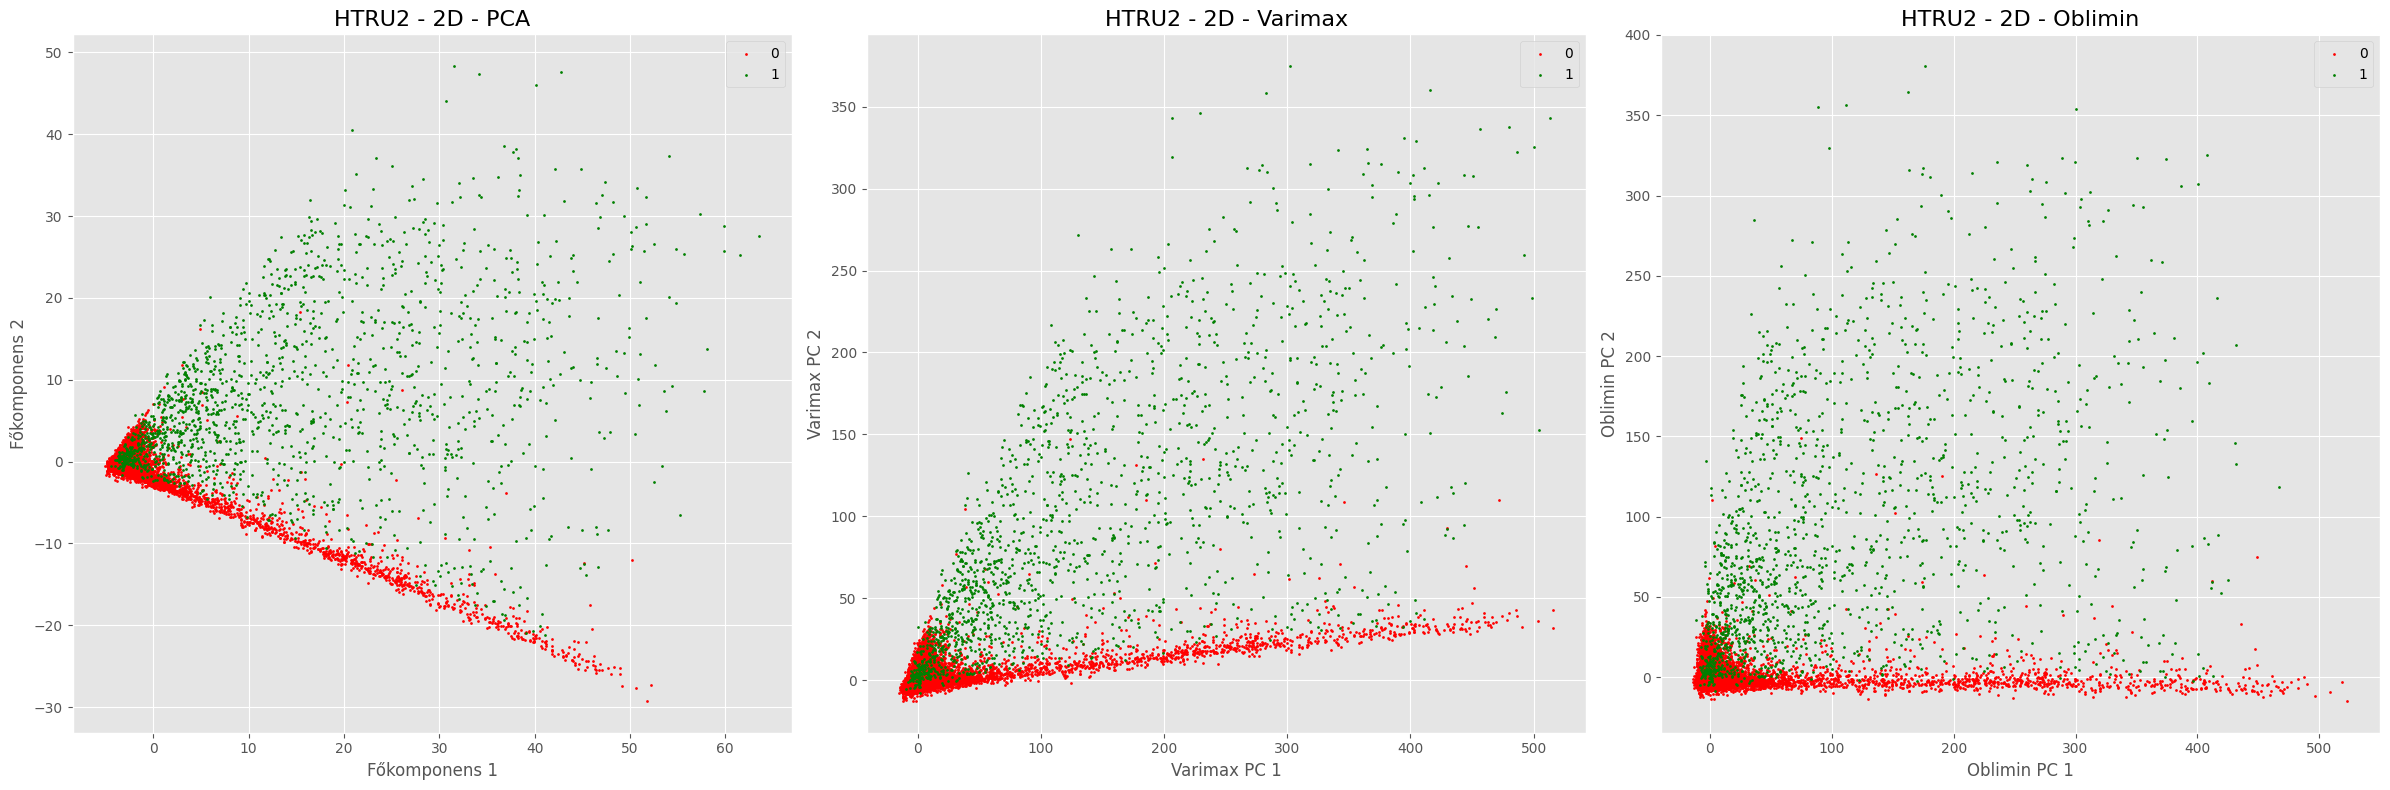

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
targets = [0, 1]
colors = ['r', 'g']

axes[0].set_title('HTRU2 - 2D - PCA', fontsize=16)
axes[0].set_xlabel('Főkomponens 1')
axes[0].set_ylabel('Főkomponens 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[0].scatter(X_2dim_pca.loc[indicesToKeep, 'PCA PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'PCA PC 2'],
                    c=color, s=2)
axes[0].legend(targets)

axes[1].set_title('HTRU2 - 2D - Varimax', fontsize=16)
axes[1].set_xlabel('Varimax PC 1')
axes[1].set_ylabel('Varimax PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[1].scatter(X_2dim_pca.loc[indicesToKeep, 'Varimax PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'Varimax PC 2'],
                    c=color, s=2)
axes[1].legend(targets)

axes[2].set_title('HTRU2 - 2D - Oblimin', fontsize=16)
axes[2].set_xlabel('Oblimin PC 1')
axes[2].set_ylabel('Oblimin PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_pca['class'] == target
    axes[2].scatter(X_2dim_pca.loc[indicesToKeep, 'Oblimin PC 1'],
                    X_2dim_pca.loc[indicesToKeep, 'Oblimin PC 2'],
                    c=color, s=2)
axes[2].legend(targets)

plt.tight_layout()
plt.show()

In [23]:
iso = Isomap(n_components=2, metric='euclidean', max_iter=100)
X_iso_metric = iso.fit_transform(X)
X_std_iso_metric = iso.fit_transform(X_std)
X_rbst_iso_metric = iso.fit_transform(X_rbst)

In [27]:
X_iso = pd.DataFrame(data = X_iso_metric, columns = ['Orig PC 1', 'Orig PC 2'])
X_iso_std = pd.DataFrame(data = X_std_iso_metric, columns = ['Std PC 1', 'Std PC 2'])
X_iso_rbst = pd.DataFrame(data = X_rbst_iso_metric, columns = ['Rbst PC 1', 'Rbst PC 2'])
X_2dim_iso = pd.concat([X_iso, X_iso_std, X_iso_rbst, y], axis = 1)
X_2dim_iso.head()

,Orig PC 1,Orig PC 2,Std PC 1,Std PC 2,Rbst PC 1,Rbst PC 2,class
0,-25.495675,-43.794240,-1.079372,-1.950554,-4.739676,-2.967558,0
1,41.863449,7.025318,-1.512153,-0.870674,-5.611411,-0.747080,0
2,-41.607557,10.253160,0.212370,0.845506,-3.153428,0.187820,0
3,-53.407725,-38.380226,-0.632483,-1.998845,-4.144080,-2.896670,0
4,205.934305,28.523655,-2.382996,3.142584,-5.524379,3.878290,0


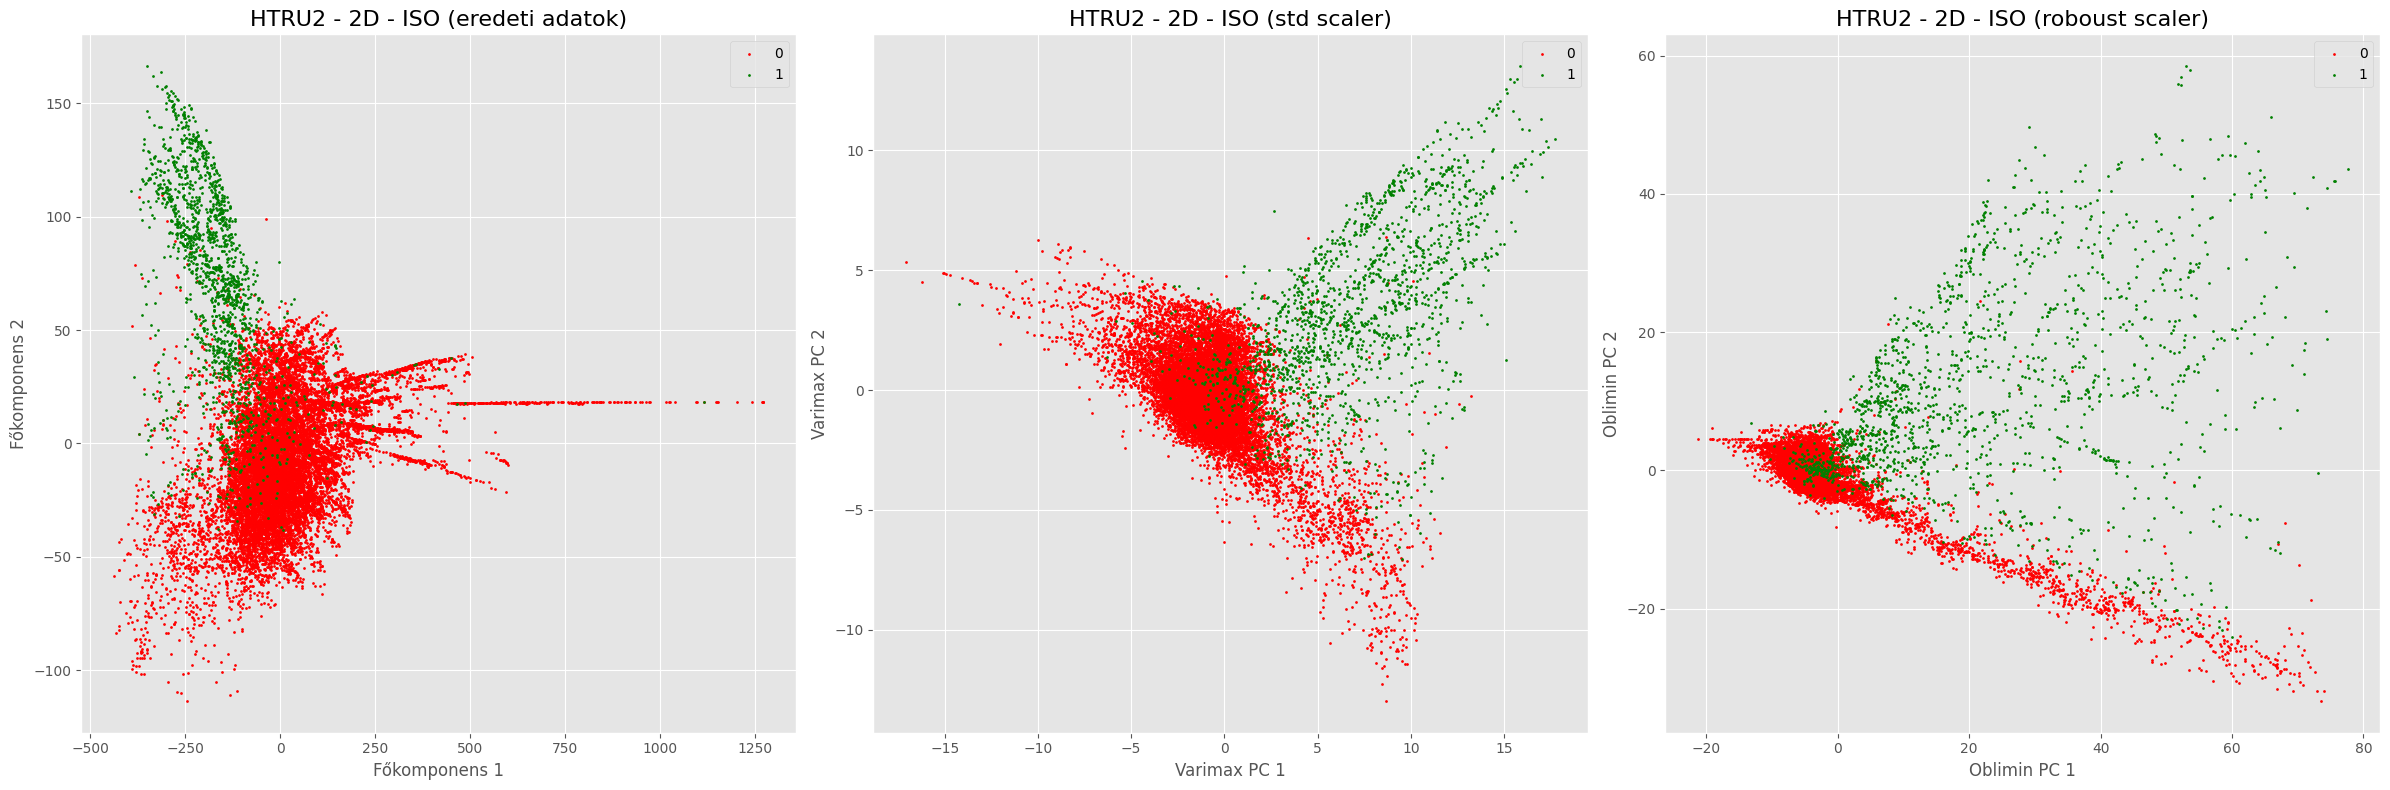

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
targets = [0, 1]
colors = ['r', 'g']

axes[0].set_title('HTRU2 - 2D - ISO (eredeti adatok)', fontsize=16)
axes[0].set_xlabel('Főkomponens 1')
axes[0].set_ylabel('Főkomponens 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_iso['class'] == target
    axes[0].scatter(X_2dim_iso.loc[indicesToKeep, 'Orig PC 1'],
                    X_2dim_iso.loc[indicesToKeep, 'Orig PC 2'],
                    c=color, s=2)
axes[0].legend(targets)

axes[1].set_title('HTRU2 - 2D - ISO (std scaler)', fontsize=16)
axes[1].set_xlabel('Varimax PC 1')
axes[1].set_ylabel('Varimax PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_iso['class'] == target
    axes[1].scatter(X_2dim_iso.loc[indicesToKeep, 'Std PC 1'],
                    X_2dim_iso.loc[indicesToKeep, 'Std PC 2'],
                    c=color, s=2)
axes[1].legend(targets)

axes[2].set_title('HTRU2 - 2D - ISO (roboust scaler)', fontsize=16)
axes[2].set_xlabel('Oblimin PC 1')
axes[2].set_ylabel('Oblimin PC 2')
for target, color in zip(targets, colors):
    indicesToKeep = X_2dim_iso['class'] == target
    axes[2].scatter(X_2dim_iso.loc[indicesToKeep, 'Rbst PC 1'],
                    X_2dim_iso.loc[indicesToKeep, 'Rbst PC 2'],
                    c=color, s=2)
axes[2].legend(targets)

plt.tight_layout()
plt.show()